<h2>Automating Crypto Webstite API Pull</h2>

In [43]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', #you can also imit the number depending on how many crypto coin you want to use(limit':'15')
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '36394a17-980b-401a-b15e-fee5ee20b253',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-05-17T14:36:56.569Z', 'error_code': 0, 'error_message': None, 'elapsed': 38, 'credit_count': 1, 'notice': None, 'total_count': 9967}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11047, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [44]:
type(data)

dict

In [45]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [46]:
#This normalizes the data and make it look preentable in a dataframe

df = pd.json_normalize(data['data'])

#This shows the time it was updated when I run the dataframe
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969958e+07,1.969958e+07,False,NaN,1,NaN,NaN,None,2024-05-17T14:36:00.000Z,66379.888056,2.941071e+10,-19.7987,0.363680,0.605412,7.157384,8.387745,-0.757912,30.470007,1.307656e+12,54.2451,1.393978e+12,None,2024-05-17T14:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:37:15.140600
1,1027,Ethereum,ETH,ethereum,8939,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201203e+08,1.201203e+08,True,NaN,2,NaN,NaN,None,2024-05-17T14:35:00.000Z,3085.211630,1.443703e+10,1.9677,0.648108,4.111454,3.551546,4.445322,-12.232402,12.918940,3.705966e+11,15.3733,3.705966e+11,None,2024-05-17T14:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:37:15.140600
2,825,Tether USDt,USDT,tether,85800,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.112055e+11,1.140866e+11,True,NaN,3,NaN,NaN,None,2024-05-17T14:35:00.000Z,1.000306,5.767911e+10,-16.7522,0.002525,0.005228,0.050639,-0.035446,0.127305,0.004572,1.112395e+11,4.6145,1.141215e+11,None,2024-05-17T14:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 16:37:15.140600
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475865e+08,1.475865e+08,False,NaN,4,NaN,NaN,None,2024-05-17T14:35:00.000Z,579.890558,1.637096e+09,-17.6540,0.206196,0.969838,-1.851701,9.808843,4.869395,65.070221,8.558400e+10,3.5503,8.558400e+10,None,2024-05-17T14:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:37:15.140600
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.488020e+08,5.761677e+08,True,NaN,5,NaN,NaN,None,2024-05-17T14:35:00.000Z,167.951551,3.434155e+09,-9.6909,0.028112,4.121258,11.808947,29.405629,-17.192617,57.724966,7.537700e+10,3.1268,9.676825e+10,None,2024-05-17T14:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:37:15.140600
5,3408,USDC,USDC,usd-coin,19185,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.331824e+10,3.331824e+10,False,NaN,6,NaN,NaN,None,2024-05-17T14:35:00.000Z,1.000187,6.503039e+09,-17.4267,0.000114,0.021271,0.020477,0.022898,0.022513,0.025073,3.332449e+10,1.3824,3.332449e+10,None,2024-05-17T14:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 16:37:15.140600
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.528895e+10,9.998761e+10,False,NaN,7,NaN,NaN,None,2024-05-17T14:36:00.000Z,0.522290,1.104353e+09,-3.6532,-0.047405,1.431476,3.403322,7.982168,-12.969714,-4.127737,2.887686e+10,1.1979,5.222899e+10,None,2024-05-17T14:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:37:15.140600
7,11419,Toncoin,TON,toncoin,329,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474221e+09,5.106705e+09,True,NaN,8,3.414167e+09,2.278113e+10,None,2024-05-17T14:35:00.000Z,6.672531,4.671043e+08,-34.7977,0.396545,0.649310,-0.969221,9.774735,79.130571,205.401993,2.318185e+10,0.9616,3.407465e+10,None,2024-05-17T14:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:37:15.140600
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.44

In [51]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15', #you can also imit the number depending on how many crypto coin you want to use(limit':'30')
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '36394a17-980b-401a-b15e-fee5ee20b253',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
  


    df = pd.json_normalize(data['data'])

    #This shows the time it was updated when I run the dataframe
    df['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df)
    df = pd.concat([df, df_append])
    
    
    if not os.path.isfile(r'/Users/k/Desktop/DATA ANALYTICS LEARNING/PYTHON/ALEX THE ANALYST/API\API.csv'):
        df.to_csv(r'/Users/k/Desktop/DATA ANALYTICS LEARNING/PYTHON/ALEX THE ANALYST/API/API.csv', header='column_names')
    else:
        df.to_csv(r' /Users/k/Desktop/DATA ANALYTICS LEARNING/PYTHON/ALEX THE ANALYST/API/API.csv', mode='a', header=False)
    
    
   


In [52]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed successfully')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2024-05-17T14:39:17.892Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9967}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11047, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-05-17T14:40:18.415Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 9967}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11047, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-05-17T14:41:18.704Z', 'error_code': 0, 'error_message': None, 'elapsed': 44, 'credit_count': 1, 'notice': None, 'total_count': 9967}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11047, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2024-05-17T14:42:19.135Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 9967}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11047, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [ ]:
df

In [53]:
df23 = pd.read_csv(r'/Users/k/Desktop/DATA ANALYTICS LEARNING/PYTHON/ALEX THE ANALYST/API/API.csv')
df23

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.969958e+07,1.969958e+07,False,NaN,1,NaN,NaN,NaN,2024-05-17T14:41:00.000Z,66355.614943,2.938209e+10,-19.8231,0.454719,0.369079,7.275872,8.064950,-0.978336,30.603298,1.307178e+12,54.2567,1.393468e+12,NaN,2024-05-17T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
1,1,1027,Ethereum,ETH,ethereum,8939,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201203e+08,1.201203e+08,True,NaN,2,NaN,NaN,NaN,2024-05-17T14:40:00.000Z,3082.068344,1.444451e+10,1.9403,0.528259,3.956127,3.671301,3.407250,-12.216635,12.830002,3.702190e+11,15.3508,3.702190e+11,NaN,2024-05-17T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
2,2,825,Tether USDt,USDT,tether,85800,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.112055e+11,1.140866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-17T14:40:00.000Z,1.000423,5.764929e+10,-16.7734,0.033937,0.016397,0.061940,0.008383,0.138377,0.002060,1.112525e+11,4.6130,1.141348e+11,NaN,2024-05-17T14:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 16:42:19.044740
3,3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475865e+08,1.475865e+08,False,NaN,4,NaN,NaN,NaN,2024-05-17T14:40:00.000Z,579.897122,1.637897e+09,-17.6321,0.288127,0.870182,-1.549292,9.545553,5.244674,65.404392,8.558496e+10,3.5487,8.558496e+10,NaN,2024-05-17T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
4,4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.488020e+08,5.761677e+08,True,NaN,5,NaN,NaN,NaN,2024-05-17T14:40:00.000Z,167.392782,3.434130e+09,-9.6351,-0.181504,3.749366,11.831737,28.035080,-17.588380,57.449210,7.512622e+10,3.1150,9.644631e+10,NaN,2024-05-17T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
5,5,3408,USDC,USDC,usd-coin,19185,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.331824e+10,3.331824e+10,False,NaN,6,NaN,NaN,NaN,2024-05-17T14:40:00.000Z,1.000253,6.508658e+09,-17.3837,0.022131,0.031239,0.006042,0.033775,0.028702,0.030569,3.332667e+10,1.3819,3.332667e+10,NaN,2024-05-17T14:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 16:42:19.044740
6,6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.528895e+10,9.998761e+10,False,NaN,7,NaN,NaN,NaN,2024-05-17T14:41:00.000Z,0.522248,1.103060e+09,-3.8649,0.054605,1.366029,3.547670,7.820792,-12.971300,-3.946996,2.887457e+10,1.1973,5.222484e+10,NaN,2024-05-17T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
7,7,11419,Toncoin,TON,toncoin,329,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3.474221e+09,5.106705e+09,True,NaN,8,3.414167e+09,2.279216e+10,NaN,2024-05-17T14:40:00.000Z,6.675762,4.645098e+08,-35.8647,0.274931,0.592735,-0.752237,9.146027,79.354709,207.006121,2.319307e+10,0.9617,3.409115e+10,NaN,2024-05-17T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
8,8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha.

In [65]:


# Load the DataFrame from a CSV file without using any column as an index
df23 = pd.read_csv(r'/Users/k/Desktop/DATA ANALYTICS LEARNING/PYTHON/ALEX THE ANALYST/API/API.csv', index_col=None)

# Display the DataFrame to identify the extra index column
print(df23.head())

# Drop the unwanted index column if it exists
if 'Unnamed: 0' in df23.columns:
    df23 = df23.drop(columns=['Unnamed: 0'])

# Reset the index to remove the existing index
df23.reset_index(drop=True, inplace=True)

# Display the DataFrame to confirm the index is reset and the column is dropped
print(df23.head())

   Unnamed: 0    id         name symbol      slug  num_market_pairs  \
0           0     1      Bitcoin    BTC   bitcoin             11047   
1           1  1027     Ethereum    ETH  ethereum              8939   
2           2   825  Tether USDt   USDT    tether             85800   
3           3  1839          BNB    BNB       bnb              2162   
4           4  5426       Solana    SOL    solana               660   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2017-07-25T00:00:00.000Z   
4  2020-04-10T00:00:00.000Z   

                                                tags     max_supply  \
0  ['mineable', 'pow', 'sha-256', 'store-of-value... 21000000.00000   
1  ['pos', 'smart-contracts', 'ethereum-ecosystem...            NaN   
2  ['stablecoin', 'asset-backed-stablecoin', 'ava...            NaN   
3  ['marketplace', 'centralized-exchange', 'payme...            NaN   
4  ['pos', 'platform', 'solana-

In [66]:
df23

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19699578.00000,19699578.00000,False,NaN,1,NaN,NaN,NaN,2024-05-17T14:41:00.000Z,66355.61494,29382094942.32697,-19.82310,0.45472,0.36908,7.27587,8.06495,-0.97834,30.60330,1307177612298.66675,54.25670,1393467913793.47998,NaN,2024-05-17T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
1,1027,Ethereum,ETH,ethereum,8939,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120120311.41094,120120311.41094,True,NaN,2,NaN,NaN,NaN,2024-05-17T14:40:00.000Z,3082.06834,14444505816.31678,1.94030,0.52826,3.95613,3.67130,3.40725,-12.21664,12.83000,370219009260.13239,15.35080,370219009260.13000,NaN,2024-05-17T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
2,825,Tether USDt,USDT,tether,85800,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,111205483123.85364,114086550454.42136,True,NaN,3,NaN,NaN,NaN,2024-05-17T14:40:00.000Z,1.00042,57649285576.76385,-16.77340,0.03394,0.01640,0.06194,0.00838,0.13838,0.00206,111252538955.35948,4.61300,114134825389.64999,NaN,2024-05-17T14:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 16:42:19.044740
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147586461.43289,147586461.43289,False,NaN,4,NaN,NaN,NaN,2024-05-17T14:40:00.000Z,579.89712,1637896992.92989,-17.63210,0.28813,0.87018,-1.54929,9.54555,5.24467,65.40439,85584964206.43735,3.54870,85584964206.44000,NaN,2024-05-17T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,448802035.39139,576167671.24951,True,NaN,5,NaN,NaN,NaN,2024-05-17T14:40:00.000Z,167.39278,3434129838.83162,-9.63510,-0.18150,3.74937,11.83174,28.03508,-17.58838,57.44921,75126221129.94992,3.11500,96446309207.28999,NaN,2024-05-17T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
5,3408,USDC,USDC,usd-coin,19185,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33318242238.95878,33318242238.95878,False,NaN,6,NaN,NaN,NaN,2024-05-17T14:40:00.000Z,1.00025,6508657816.02567,-17.38370,0.02213,0.03124,0.00604,0.03378,0.02870,0.03057,33326665895.95507,1.38190,33326665895.96000,NaN,2024-05-17T14:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 16:42:19.044740
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55288951055.00000,99987612649.00000,False,NaN,7,NaN,NaN,NaN,2024-05-17T14:41:00.000Z,0.52225,1103059928.00656,-3.86490,0.05461,1.36603,3.54767,7.82079,-12.97130,-3.94700,28874566010.89842,1.19730,52224839610.68000,NaN,2024-05-17T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
7,11419,Toncoin,TON,toncoin,329,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3474221409.45838,5106705480.40014,True,NaN,8,3414166606.00000,22792162191.12439,NaN,2024-05-17T14:40:00.000Z,6.67576,464509830.56560,-35.86470,0.27493,0.59274,-0.75224,9.14603,79.35471,207.00612,23193073739.60417,0.96170,34091148149.31000,NaN,2024-05-17T14:40:00.000Z,NaN,NaN,NaN,

In [63]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [64]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11047,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19699578.00000,19699578.00000,False,NaN,1,NaN,NaN,None,2024-05-17T14:41:00.000Z,66355.61494,29382094942.32697,-19.82310,0.45472,0.36908,7.27587,8.06495,-0.97834,30.60330,1307177612298.66675,54.25670,1393467913793.47998,None,2024-05-17T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
1,1027,Ethereum,ETH,ethereum,8939,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120120311.41094,120120311.41094,True,NaN,2,NaN,NaN,None,2024-05-17T14:40:00.000Z,3082.06834,14444505816.31678,1.94030,0.52826,3.95613,3.67130,3.40725,-12.21664,12.83000,370219009260.13239,15.35080,370219009260.13000,None,2024-05-17T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
2,825,Tether USDt,USDT,tether,85800,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,111205483123.85364,114086550454.42137,True,NaN,3,NaN,NaN,None,2024-05-17T14:40:00.000Z,1.00042,57649285576.76385,-16.77340,0.03394,0.01640,0.06194,0.00838,0.13838,0.00206,111252538955.35948,4.61300,114134825389.64999,None,2024-05-17T14:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-17 16:42:19.044740
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586461.43289,147586461.43289,False,NaN,4,NaN,NaN,None,2024-05-17T14:40:00.000Z,579.89712,1637896992.92989,-17.63210,0.28813,0.87018,-1.54929,9.54555,5.24467,65.40439,85584964206.43735,3.54870,85584964206.44000,None,2024-05-17T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448802035.39139,576167671.24951,True,NaN,5,NaN,NaN,None,2024-05-17T14:40:00.000Z,167.39278,3434129838.83162,-9.63510,-0.18150,3.74937,11.83174,28.03508,-17.58838,57.44921,75126221129.94992,3.11500,96446309207.28999,None,2024-05-17T14:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
5,3408,USDC,USDC,usd-coin,19185,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33318242238.95878,33318242238.95878,False,NaN,6,NaN,NaN,None,2024-05-17T14:40:00.000Z,1.00025,6508657816.02567,-17.38370,0.02213,0.03124,0.00604,0.03378,0.02870,0.03057,33326665895.95507,1.38190,33326665895.96000,None,2024-05-17T14:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-17 16:42:19.044740
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55288951055.00000,99987612649.00000,False,NaN,7,NaN,NaN,None,2024-05-17T14:41:00.000Z,0.52225,1103059928.00656,-3.86490,0.05461,1.36603,3.54767,7.82079,-12.97130,-3.94700,28874566010.89843,1.19730,52224839610.68000,None,2024-05-17T14:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-17 16:42:19.044740
7,11419,Toncoin,TON,toncoin,329,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3474221409.45838,5106705480.40014,True,NaN,8,3414166606.00000,22792162191.12438,None,2024-05-17T14:40:00.000Z,6.67576,464509830.56560,-35.86470,0.27493,0.59274,-0.75224,9.14603,79.35471,207.00612,23193073739.60417,0.96170,34091148149.31000,None,2024-05-17T14:40:00.0

In [67]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.45472,0.36908,7.27587,8.06495,-0.97834,30.60330
Ethereum,0.52826,3.95613,3.67130,3.40725,-12.21664,12.83000
Tether USDt,0.03394,0.01640,0.06194,0.00838,0.13838,0.00206
BNB,0.28813,0.87018,-1.54929,9.54555,5.24467,65.40439
Solana,-0.18150,3.74937,11.83174,28.03508,-17.58838,57.44921
USDC,0.02213,0.03124,0.00604,0.03378,0.02870,0.03057
XRP,0.05461,1.36603,3.54767,7.82079,-12.97130,-3.94700
Toncoin,0.27493,0.59274,-0.75224,9.14603,79.35471,207.00612
Dogecoin,0.51350,1.02672,4.49409,2.66100,6.83402,85.14886


In [68]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.45472
             quote.USD.percent_change_24h     0.36908
             quote.USD.percent_change_7d      7.27587
             quote.USD.percent_change_30d     8.06495
             quote.USD.percent_change_60d    -0.97834
             quote.USD.percent_change_90d    30.60330
Ethereum     quote.USD.percent_change_1h      0.52826
             quote.USD.percent_change_24h     3.95613
             quote.USD.percent_change_7d      3.67130
             quote.USD.percent_change_30d     3.40725
             quote.USD.percent_change_60d   -12.21664
             quote.USD.percent_change_90d    12.83000
Tether USDt  quote.USD.percent_change_1h      0.03394
             quote.USD.percent_change_24h     0.01640
             quote.USD.percent_change_7d      0.06194
             quote.USD.percent_change_30d     0.00838
             quote.USD.percent_change_60d     0.13838
             quote.USD.percent_change_90

In [70]:
type(df4)

pandas.core.series.Series

In [71]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.45472
            quote.USD.percent_change_24h   0.36908
            quote.USD.percent_change_7d    7.27587
            quote.USD.percent_change_30d   8.06495
            quote.USD.percent_change_60d  -0.97834
            quote.USD.percent_change_90d  30.60330
Ethereum    quote.USD.percent_change_1h    0.52826
            quote.USD.percent_change_24h   3.95613
            quote.USD.percent_change_7d    3.67130
            quote.USD.percent_change_30d   3.40725
            quote.USD.percent_change_60d -12.21664
            quote.USD.percent_change_90d  12.83000
Tether USDt quote.USD.percent_change_1h    0.03394
            quote.USD.percent_change_24h   0.01640
            quote.USD.percent_change_7d    0.06194
            quote.USD.percent_change_30d   0.00838
            quote.USD.percent_change_60d   0.13838
            quote.USD.percent_change_90d   0.00206
BNB         quote.USD.percent_change_1h    0.28813
            quote.USD.percent_change_24h   0.87018
            quote.USD.percent_change_7d   -1.54929
            quote.USD.percent_change_30d   9.54555
            quote.USD.percent_change_60d   5.24467
            quote.USD.percent_change_90d  65.40439
Solana      quote.USD.percent_change_1h   -0.18150
            quote.USD.percent_change_24h   3.74937
            quote.USD.percent_change_7d   11.83174
            quote.USD.percent_change_30d  28.03508
            quote.USD.percent_change_60d -17.58838
            quote.USD.percent_change_90d  57.44921
USDC        quote.USD.percent_change_1h    0.02213
            quote.USD.percent_change_24h   0.03124
            quote.USD.percent_change_7d    0.00604
            quote.USD.percent_change_30d   0.03378
            quote.USD.percent_change_60d   0.02870
            quote.USD.percent_change_90d   0.03057
XRP         quote.USD.percent_change_1h    0.05461
            quote.USD.percent_change_24h   1.36603
            quote.USD.percent_change_7d    3.54767
            quote.USD.percent_change_30d   7.82079
            quote.USD.percent_change_60d -12.97130
            quote.USD.percent_change_90d  -3.94700
Toncoin     quote.USD.percent_change_1h    0.27493
            quote.USD.percent_change_24h   0.59274
            quote.USD.percent_change_7d   -0.75224
            quote.USD.percent_change_30d   9.14603
            quote.USD.percent_change_60d  79.35471
            quote.USD.percent_change_90d 207.00612
Dogecoin    quote.USD.percent_change_1h    0.51350
            quote.USD.percent_change_24h   1.02672
            quote.USD.percent_change_7d    4.49409
            quote.USD.percent_change_30d   2.66100
            quote.USD.percent_change_60d   6.83402
            quote.USD.percent_change_90d  85.14886
Cardano     quote.USD.percent_change_1h   -0.80677
            quote.USD.percent_change_24h   5.42665
            quote.USD.percent_change_7d    5.33377
            quote.USD.percent_change_30d   9.16062
            quote.USD.percent_change_60d -26.93373
            quote.USD.percent_change_90d -16.34157
Shiba Inu   quote.USD.percent_change_1h    0.21800
            quote.USD.percent_change_24h   1.33656
            quote.USD.percent_change_7d    9.68395
            quote.USD.percent_change_30d  14.56988
            quote.USD.percent_change_60d  -7.89839
            quote.USD.percent_change_90d 163.11781
Avalanche   quote.USD.percent_change_1h    0.02220
            quote.USD.percent_change_24h   6.88391
            quote.USD.percent_change_7d    5.41183
            quote.USD.percent_change_30d  10.57197
            quote.USD.percent_change_60d -40.05409
            quote.USD.percent_change_90d  -5.05549
TRON        quote.USD.percent_change_1h    0.01227
            quote.USD.percent_change_24h  -0.29261
            quote.USD.percent_change_7d   -0.76437
            quote.USD.percent_change_30d  13.33575
            quote.USD.percent_change_60d   0.51315
            quo

In [73]:
df5.count()

values    90
dtype: int64

In [74]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.45472
1,Bitcoin,quote.USD.percent_change_24h,0.36908
2,Bitcoin,quote.USD.percent_change_7d,7.27587
3,Bitcoin,quote.USD.percent_change_30d,8.06495
4,Bitcoin,quote.USD.percent_change_60d,-0.97834
5,Bitcoin,quote.USD.percent_change_90d,30.60330
6,Ethereum,quote.USD.percent_change_1h,0.52826
7,Ethereum,quote.USD.percent_change_24h,3.95613
8,Ethereum,quote.USD.percent_change_7d,3.67130
9,Ethereum,quote.USD.percent_change_30d,3.40725


In [76]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.45472
1,Bitcoin,quote.USD.percent_change_24h,0.36908
2,Bitcoin,quote.USD.percent_change_7d,7.27587
3,Bitcoin,quote.USD.percent_change_30d,8.06495
4,Bitcoin,quote.USD.percent_change_60d,-0.97834
5,Bitcoin,quote.USD.percent_change_90d,30.60330
6,Ethereum,quote.USD.percent_change_1h,0.52826
7,Ethereum,quote.USD.percent_change_24h,3.95613
8,Ethereum,quote.USD.percent_change_7d,3.67130
9,Ethereum,quote.USD.percent_change_30d,3.40725


In [81]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.45472
1,Bitcoin,24h,0.36908
2,Bitcoin,7d,7.27587
3,Bitcoin,30d,8.06495
4,Bitcoin,60d,-0.97834
5,Bitcoin,90d,30.60330
6,Ethereum,1h,0.52826
7,Ethereum,24h,3.95613
8,Ethereum,7d,3.67130
9,Ethereum,30d,3.40725


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

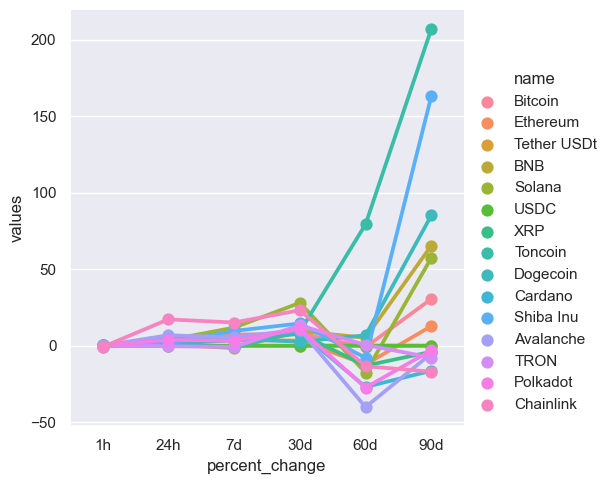

In [92]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [96]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Avalanche'")
df8

,name,quote.USD.price,timestamp
11,Avalanche,36.67832,2024-05-17 16:42:19.044740
11,Avalanche,36.67832,2024-05-17 16:42:19.044740


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

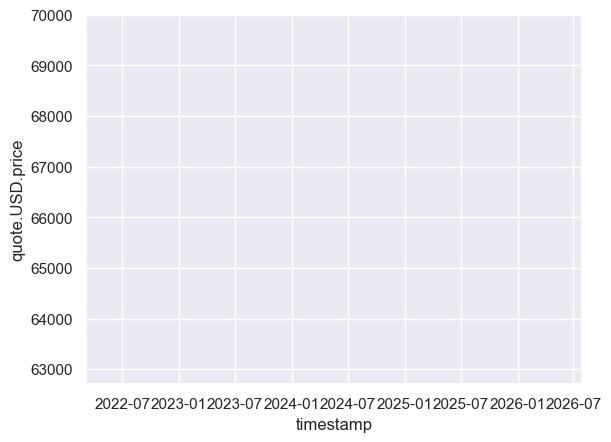

In [95]:
sns.set_theme(style='darkgrid')
sns.lineplot(x= 'timestamp', y = 'quote.USD.price', data = df8)